In [235]:
# Import the machine learning libraries.
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [236]:
# Load Boston housing dataset.
boston = load_boston()
X, y = boston.data, boston.target
print(X.shape, y.shape)

(506, 13) (506,)


In [237]:
# Transform features by scaling each feature to a given range.
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [238]:
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

(506, 13, 1)


In [239]:
# Split data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [240]:
# Define the model.
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(13, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
 
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 12, 32)            96        
_________________________________________________________________
flatten_18 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                24640     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 24,801
Trainable params: 24,801
Non-trainable params: 0
_________________________________________________________________


In [241]:
# Fit the model.
%%time
hist = model.fit(X_train, y_train, batch_size=12, epochs=500, verbose=0)

CPU times: user 32.6 s, sys: 1.64 s, total: 34.3 s
Wall time: 24.1 s


In [242]:
print(hist.history.keys())

dict_keys(['loss'])


In [243]:
# Predict the test data with the trained model.
y_pred = model.predict(X_test)

In [244]:
# Evaluate the model.
print(model.evaluate(X_train, y_train))

404/404 [==============================] - 0s 78us/step
6.165363049743199


In [245]:
# The mean squared error.
print("MSE: %.4f" % mean_squared_error(y_test, y_pred))

MSE: 12.4181


In [246]:
# The coefficient of determination: 1 is perfect prediction.
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))

Coefficient of determination: 0.8702


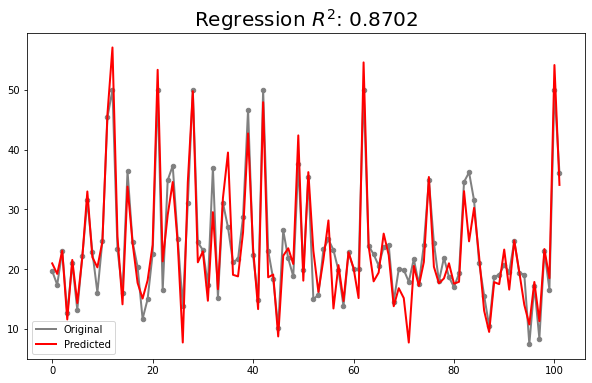

In [247]:
fig = plt.figure(figsize=(10,6))
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=20, color="gray")
plt.plot(x_ax, y_test, lw=2, color="gray", label="Original")
plt.plot(x_ax, y_pred, lw=2, color="red", label="Predicted")
plt.legend()
plt.title("Regression $R^2$: %.4f" % (r2_score(y_test, y_pred)), fontsize=20)
plt.show()